In [13]:
"""
Necessary Comment : jupyter notebook
"""

'\nNecessary Comment : jupyter notebook\n'

In [4]:
"""
Necessary Lighbary
"""
import sqlite3
import pandas as pd
import talib
import mplfinance as mpf
import numpy as np

In [5]:
"""
Database Connection
"""
connection = sqlite3.connect(r"cripto.db")
cur = connection.cursor()
database_data = cur.execute("select * from asset order by CloseTime").fetchall()

In [6]:
"""
Dataframe
"""
df = pd.DataFrame(database_data)
df

,0,1,2,3,4,5,6,7,8,9,10,11
0,1,BTCBUSD,16617.48,16622.19,16616.02,16621.68,33.78673,0.0252745903711076,1669440299999,664.0,22.26316,1.669440e+09
1,2,BTCBUSD,16621.97,16624.08,16620.13,16621.09,29.60535,-0.00529419798014928,1669440359999,579.0,13.33170,1.669440e+09
2,3,BTCBUSD,16621.54,16625.95,16619.30,16621.87,49.48804,0.00198537560297125,1669440419999,1070.0,24.97511,1.669440e+09
3,4,BTCBUSD,16621.96,16628.06,16620.83,16625.72,44.92542,0.0226206777058905,1669440479999,715.0,27.98584,1.669440e+09
4,5,BTCBUSD,16625.90,16630.99,16624.81,16630.26,42.83208,0.0262241442568339,1669440539999,760.0,22.47060,1.669440e+09
...,...,...,...,...,...,...,...,...,...,...,...,...
1865,1866,BTCBUSD,16546.34,16547.15,16544.53,16545.62,17.92519,-0.00435141547920062,1669555199999,434.0,8.00625,1.669555e+09
1866,1867,BTCBUSD,16545.95,16547.50,16543.73,16545.65,45.65405,-0.00181313251882952,1669555259999,670.0,19.64967,1.669555e+09
1867,1868,BTCBUSD,16545.65,16551.01,16545.43,16549.39,52.58485,0.0226041285775897,1669555319999,790.0,30.56801,1.669555e+09
1868,1869,BTCBUSD,16549.50,16551.00,16548.30,16551.00,35.59966,0.0090637179370978,1669555379999,578.0,17.61941,1.669555e+09


In [7]:
"""
Name Columns
"""
df.columns = ['Id', 'Symbol', 'Open', 'High', 'Low', 'Close', 'VolumeBTC', 'Change', 'CloseTime', 'Trades', 'BuyQuoteVolume', 'Time']
# df = df.iloc[:, 2:12]
df


,Id,Symbol,Open,High,Low,Close,VolumeBTC,Change,CloseTime,Trades,BuyQuoteVolume,Time
0,1,BTCBUSD,16617.48,16622.19,16616.02,16621.68,33.78673,0.0252745903711076,1669440299999,664.0,22.26316,1.669440e+09
1,2,BTCBUSD,16621.97,16624.08,16620.13,16621.09,29.60535,-0.00529419798014928,1669440359999,579.0,13.33170,1.669440e+09
2,3,BTCBUSD,16621.54,16625.95,16619.30,16621.87,49.48804,0.00198537560297125,1669440419999,1070.0,24.97511,1.669440e+09
3,4,BTCBUSD,16621.96,16628.06,16620.83,16625.72,44.92542,0.0226206777058905,1669440479999,715.0,27.98584,1.669440e+09
4,5,BTCBUSD,16625.90,16630.99,16624.81,16630.26,42.83208,0.0262241442568339,1669440539999,760.0,22.47060,1.669440e+09
...,...,...,...,...,...,...,...,...,...,...,...,...
1865,1866,BTCBUSD,16546.34,16547.15,16544.53,16545.62,17.92519,-0.00435141547920062,1669555199999,434.0,8.00625,1.669555e+09
1866,1867,BTCBUSD,16545.95,16547.50,16543.73,16545.65,45.65405,-0.00181313251882952,1669555259999,670.0,19.64967,1.669555e+09
1867,1868,BTCBUSD,16545.65,16551.01,16545.43,16549.39,52.58485,0.0226041285775897,1669555319999,790.0,30.56801,1.669555e+09
1868,1869,BTCBUSD,16549.50,16551.00,16548.30,16551.00,35.59966,0.0090637179370978,1669555379999,578.0,17.61941,1.669555e+09


In [8]:
"""
Candle Data Column
"""
df_candle = df[['CloseTime', 'Open', 'High', 'Low', 'Close', 'VolumeBTC']]
df_candle

,CloseTime,Open,High,Low,Close,VolumeBTC
0,1669440299999,16617.48,16622.19,16616.02,16621.68,33.78673
1,1669440359999,16621.97,16624.08,16620.13,16621.09,29.60535
2,1669440419999,16621.54,16625.95,16619.30,16621.87,49.48804
3,1669440479999,16621.96,16628.06,16620.83,16625.72,44.92542
4,1669440539999,16625.90,16630.99,16624.81,16630.26,42.83208
...,...,...,...,...,...,...
1865,1669555199999,16546.34,16547.15,16544.53,16545.62,17.92519
1866,1669555259999,16545.95,16547.50,16543.73,16545.65,45.65405
1867,1669555319999,16545.65,16551.01,16545.43,16549.39,52.58485
1868,1669555379999,16549.50,16551.00,16548.30,16551.00,35.59966


In [9]:
"""
Time Indexing
"""
df_candle = df.set_index('CloseTime')
df_candle.index = pd.to_datetime(df.index, unit='ms')

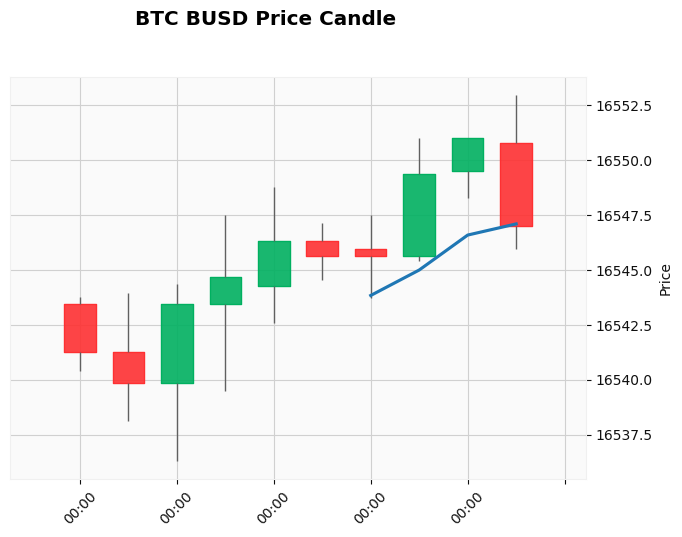

In [22]:
mpf.plot(
    df_candle.tail(10),
#     df,
    mav=[7, 25 , 90],
    type="candle",
#     type="renko",
    title=f"BTC BUSD Price Candle",
    style="yahoo",
)


In [24]:
df = df.set_index('CloseTime')
df.index = pd.to_datetime(df.index, unit='ms')
df = df.tail(100)
df

,Id,Symbol,Open,High,Low,Close,VolumeBTC,Change,Trades,BuyQuoteVolume,Time
CloseTime,,,,,,,,,,,
2022-11-27 11:35:59.999,1771,BTCBUSD,16539.82,16541.79,16531.03,16539.45,93.94827,-0.00223702555408089,1737.0,41.45815,1.669549e+09
2022-11-27 11:36:59.999,1772,BTCBUSD,16539.42,16544.97,16534.35,16537.15,121.91700,-0.0137247859961038,2085.0,60.31334,1.669549e+09
2022-11-27 11:37:59.999,1773,BTCBUSD,16537.15,16541.82,16536.05,16537.10,38.44325,-0.000302349558436069,836.0,21.60968,1.669549e+09
2022-11-27 11:38:59.999,1774,BTCBUSD,16537.98,16538.27,16536.08,16537.54,28.03870,-0.00266054258137143,633.0,15.76803,1.669549e+09
2022-11-27 11:39:59.999,1775,BTCBUSD,16537.54,16538.96,16533.62,16534.83,31.45853,-0.0163869596082557,777.0,10.99590,1.669549e+09
...,...,...,...,...,...,...,...,...,...,...,...
2022-11-27 13:19:59.999,1866,BTCBUSD,16546.34,16547.15,16544.53,16545.62,17.92519,-0.00435141547920062,434.0,8.00625,1.669555e+09
2022-11-27 13:20:59.999,1867,BTCBUSD,16545.95,16547.50,16543.73,16545.65,45.65405,-0.00181313251882952,670.0,19.64967,1.669555e+09
2022-11-27 13:21:59.999,1868,BTCBUSD,16545.65,16551.01,16545.43,16549.39,52.58485,0.0226041285775897,790.0,30.56801,1.669555e+09


In [68]:
# Find Candle Pattern
ENGULFING = talib.CDLENGULFING(df['Open'], df['High'], df['Low'],
                                         df['Close'])
print(ENGULFING)
ENGULFING[ENGULFING != 0]
df1=pd.DataFrame(ENGULFING)
df1

CloseTime
2022-11-27 11:35:59.999    0
2022-11-27 11:36:59.999    0
2022-11-27 11:37:59.999    0
2022-11-27 11:38:59.999    0
2022-11-27 11:39:59.999    0
                          ..
2022-11-27 13:19:59.999    0
2022-11-27 13:20:59.999    0
2022-11-27 13:21:59.999    0
2022-11-27 13:22:59.999    0
2022-11-27 13:23:59.999    0
Length: 100, dtype: int32


,0
CloseTime,
2022-11-27 11:35:59.999,0
2022-11-27 11:36:59.999,0
2022-11-27 11:37:59.999,0
2022-11-27 11:38:59.999,0
2022-11-27 11:39:59.999,0
...,...
2022-11-27 13:19:59.999,0
2022-11-27 13:20:59.999,0
2022-11-27 13:21:59.999,0


In [70]:
bullish_engulfing = (ENGULFING.replace([-100, 0], np.nan)/100) *(df.Low-2)
bearsh_engulfing = (-ENGULFING.replace([100, 0], np.nan)/100) *(df.High *1.0001)
bullish_engulfing
df1=pd.DataFrame(bullish_engulfing)
df2=pd.DataFrame(bearsh_engulfing)
df1
df2



,0
CloseTime,
2022-11-27 11:35:59.999,NaN
2022-11-27 11:36:59.999,NaN
2022-11-27 11:37:59.999,NaN
2022-11-27 11:38:59.999,NaN
2022-11-27 11:39:59.999,NaN
...,...
2022-11-27 13:19:59.999,NaN
2022-11-27 13:20:59.999,NaN
2022-11-27 13:21:59.999,NaN


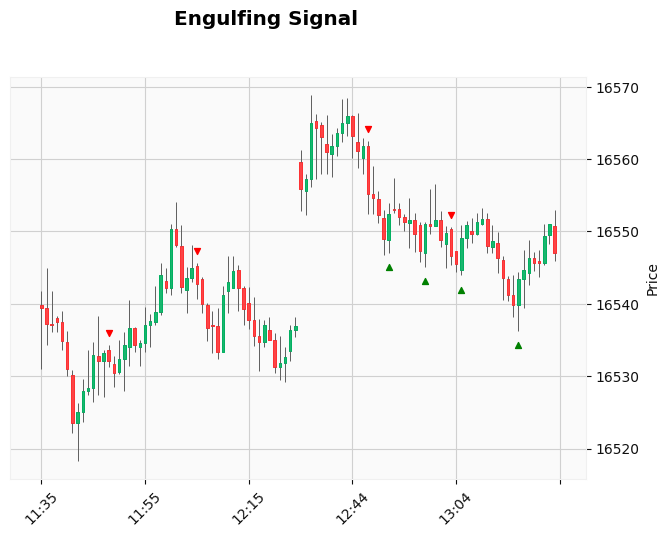

In [38]:
addplot = [mpf.make_addplot(bullish_engulfing, type='scatter', color='g', marker = "^"), mpf.make_addplot(bearsh_engulfing, type='scatter', color='r', marker = "v")]

mpf.plot(df, addplot = addplot,title=f"Engulfing Signal", type="candle",style="yahoo")

In [63]:
"""
X value for DecisionTreeClassifier

X = df.drop(columns=['Open', 'High', 'Low', 'Close', 'VolumeBTC', 'Change', 'CloseTime', 'BuyQuoteVolume', 'Time'])
X

X= df.drop(columns=['Id','Symbol','Time'])
print(X)
"""

X=df1
Y=df2
Y

print(X)

                          0
CloseTime                  
2022-11-27 11:35:59.999 NaN
2022-11-27 11:36:59.999 NaN
2022-11-27 11:37:59.999 NaN
2022-11-27 11:38:59.999 NaN
2022-11-27 11:39:59.999 NaN
...                      ..
2022-11-27 13:19:59.999 NaN
2022-11-27 13:20:59.999 NaN
2022-11-27 13:21:59.999 NaN
2022-11-27 13:22:59.999 NaN
2022-11-27 13:23:59.999 NaN

[100 rows x 1 columns]


In [170]:
import re
df=pd.read_csv(r"C:\Users\Soadul Rabbi\Downloads\Dummy - Sheet1.csv")
print(df)
X=df.iloc[:,1:3]
eng=df.iloc[:,0]
y=df.iloc[:,-1]
print("==========")
print(eng)
for x in range(1,len(eng)):
    if re.search("Engulfing", eng[x]):
        df.iloc[x,4]=3
        print("Ok",x)
print("After updating Y")
print(y)


                      Hammer   2        -100   Bearsh    1
0           Piercing Pattern   3  100.000000  Bullish  0.0
1          Bullish Engulfing   4  100.000000  Bullish  0.0
2           The Morning Star   5 -100.000000   Bearsh  1.0
3       Three White Soldiers   6  100.000000  Bullish  0.0
4             White Marubozu   7  100.000000  Bullish  0.0
5            Three Inside Up   8 -100.000000   Bearsh  1.0
6             Bullish Harami   9  100.000000  Bullish  0.0
7   Tweezer Bottom Engulfing  10 -100.000000   Bearsh  1.0
8                     Hammer  11   -5.555556   Bearsh  1.0
9           Piercing Pattern  12   -8.888889  Bullish  0.0
10         Bullish Engulfing  13  -12.222222  Bullish  0.0
11          The Morning Star  14  -15.555556   Bearsh  1.0
12      Three White Soldiers  15  -18.888889  Bullish  0.0
13            White Marubozu  16  -22.222222  Bullish  0.0
14           Three Inside Up  17  -25.555556   Bearsh  1.0
15            Bullish Harami  18  -28.888889  Bullish  0

In [137]:
"""
y value for DecisionTreeClassifier

"""



0    0
1    0
2    1
3    0
4    0
5    1
6    0
7    1
Name: 1, dtype: int64


In [65]:
"""
Model for AI Research
"""
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

model = DecisionTreeClassifier()
#model=RandomForestClassifier()
model

DecisionTreeClassifier()

In [66]:
model.fit(X, Y)

ValueError: Input X contains NaN.
DecisionTreeClassifier does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

In [147]:
# model.predict([  [40, 0],[60, 1] ])
model.predict([ [3,100] ])
print(model.predict([ [11,100] ]))

[0]


C:\Users\Soadul Rabbi\PycharmProjects\TradingAi\venv\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\Soadul Rabbi\PycharmProjects\TradingAi\venv\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
